In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
# from tensorflow.keras.datasets.mnist import load_data
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
class CNN( nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=3,
                              kernel_size=5, stride=1)
        
        self.conv2 = nn.Conv2d(in_channels=3,out_channels=10,
                              kernel_size=5, stride=1)        
        
        self.max1 = nn.MaxPool2d(kernel_size=2)
        
        self.fc1 = nn.Linear( 10*10*10, 50)
        self.fc2 = nn.Linear( 50, 10)
        
        self.smax = nn.Softmax(dim=1)
    def forward( self, x):
        x = F.relu( self.conv1(x) ) # self.relu1( x)
        x = F.relu( self.conv2(x) )
        x =  self.max1(x)
#         print('max size', x.size() )
        x = x.view( -1,10*10*10 )
        x = F.relu( self.fc1(x) )
        x = self.fc2(x)
        x = self.smax(x)
        return x

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
x_data = mnist['data'].values/255
x_data = x_data.reshape( -1, 1, 28, 28 )
y_data = mnist['target'].astype(np.int32)
y_data = np.eye(10)[y_data]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,
                                               test_size=0.3, stratify=y_data )

In [6]:
x_train.shape

(49000, 1, 28, 28)

In [7]:
x_test.shape

(21000, 1, 28, 28)

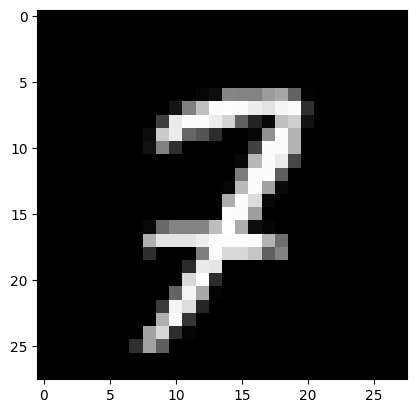

In [8]:
plt.imshow( x_train[0].reshape(28,28) , cmap='gray')
plt.show()

In [9]:
x= torch.FloatTensor( x_train)
y = torch.FloatTensor( y_train)

In [10]:
model = CNN()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam( model.parameters(), lr=0.01 )

for step in range(200):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn( hx, y)
    cost.backward()
    optimizer.step()
    print('======================')
    rdata = y.argmax( dim=1).numpy()
    pred = hx.argmax( dim=1).numpy()
    print('정확도:', accuracy_score( rdata, pred))
    print(step, cost.item() )

정확도: 0.09957142857142857
0 2.302777051925659
정확도: 0.162265306122449
1 2.2942450046539307
정확도: 0.2913877551020408
2 2.25373911857605
정확도: 0.2821836734693878
3 2.172417640686035
정확도: 0.25446938775510203
4 2.184116840362549
정확도: 0.27585714285714286
5 2.1679258346557617
정확도: 0.269734693877551
6 2.1453866958618164
정확도: 0.4820408163265306
7 2.0098743438720703
정확도: 0.5093469387755102
8 1.9745031595230103
정확도: 0.5794897959183674
9 1.9219363927841187
정확도: 0.5886938775510204
10 1.8871361017227173
정확도: 0.6387551020408163
11 1.8396995067596436
정확도: 0.6562448979591837
12 1.8107799291610718
정확도: 0.6827755102040817
13 1.7808737754821777
정확도: 0.7147755102040816
14 1.753057599067688
정확도: 0.7227142857142858
15 1.7425678968429565
정확도: 0.7439795918367347
16 1.7210631370544434
정확도: 0.7541428571428571
17 1.708225131034851
정확도: 0.7613265306122449
18 1.700455665588379
정확도: 0.7789795918367347
19 1.682735800743103
정확도: 0.7839795918367347
20 1.6789416074752808
정확도: 0.7928163265306123
21 1.6694966554641724
정확도: 0

정확도: 0.8913061224489796
120 1.5703874826431274
정확도: 0.8916122448979592
121 1.5700669288635254
정확도: 0.8918163265306123
122 1.5697531700134277
정확도: 0.8921428571428571
123 1.5694488286972046
정확도: 0.8925918367346939
124 1.5691524744033813
정확도: 0.892734693877551
125 1.5688596963882446
정확도: 0.8930408163265307
126 1.56857430934906
정확도: 0.8932040816326531
127 1.5682936906814575
정확도: 0.8934693877551021
128 1.568016529083252
정확도: 0.8936938775510204
129 1.5677410364151
정확도: 0.8939591836734694
130 1.5674687623977661
정확도: 0.8942857142857142
131 1.5672005414962769
정확도: 0.8945510204081633
132 1.5669395923614502
정확도: 0.894795918367347
133 1.5666862726211548
정확도: 0.8950204081632653
134 1.5664374828338623
정확도: 0.8950816326530612
135 1.5661916732788086
정확도: 0.8953673469387755
136 1.5659501552581787
정확도: 0.8957551020408163
137 1.5657141208648682
정확도: 0.8960204081632653
138 1.5654840469360352
정확도: 0.8962448979591837
139 1.5652594566345215
정확도: 0.8964081632653061
140 1.565041184425354
정확도: 0.896612244897959